# **Autoencoders**

We will implement an autoencoder composed of an encoder and a decoder using TensorFlow and train it on the CIFAR-10 dataset.

**Import Libraries**

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import tensorflow.keras.utils as np_utils

**Load CIFAR-10 Dataset**

In [22]:
(X_train, _), (X_test, _) = cifar10.load_data()

**Reshape Dataset**

In [24]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Perform Data Normalization**

In [25]:
X_train /= 255
X_test /= 255

**Define Encoder Architecture**

In [13]:
encoder_inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(16, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
encoder_outputs = layers.MaxPooling2D(2, padding="same")(x)

encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584 

**Define Decoder Architecture**

In [28]:
decoder_inputs = keras.Input(shape=(4, 4, 8))
x = layers.Conv2D(8, 3, activation="relu", padding="same")(decoder_inputs)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(16, 3, activation="relu", padding = "same")(x)
x = layers.UpSampling2D(2)(x)
decoder_outputs = layers.Conv2D(3, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_7 (UpSamplin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        1168

**Define Autoencoder**

Define autoencoder as a sequential model.

In [29]:
autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

**Train Autoencoder**

In [38]:
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=
(X_test, X_test))

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5726 - val_loss: 0.5737
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5726 - val_loss: 0.5755
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5725 - val_loss: 0.5739
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5725 - val_loss: 0.5734
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5724 - val_loss: 0.5732
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5724 - val_loss: 0.5732
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5723 - val_loss: 0.5729
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5723 - val_loss: 0.5732
Epoch 9/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5723 - val_loss: 0.5737
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - l

**Encode And Decode Test Images**

In [39]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


**Display Images**

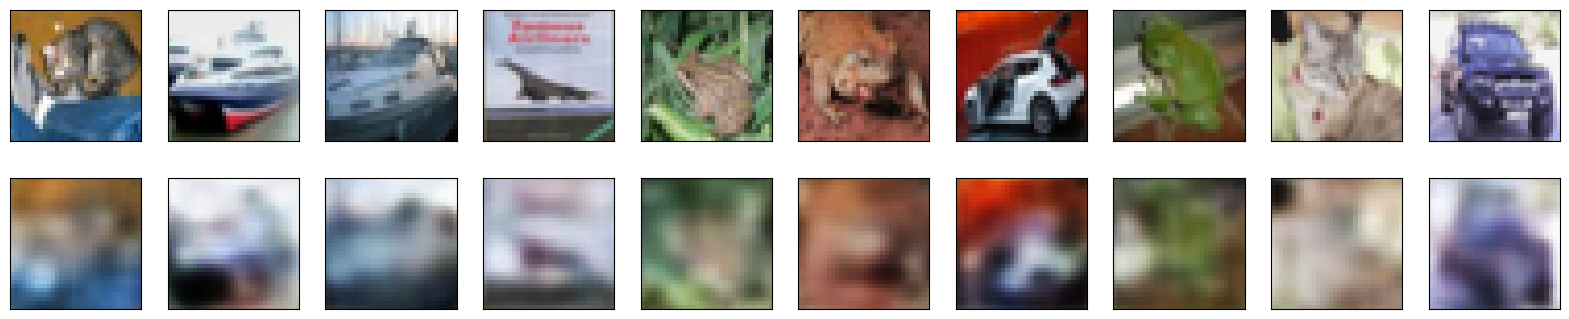

In [40]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()